# Insights for Stakeholders

## Lesson Objectives
By the end of this lesson, students will be able to:
- Define the stakeholder and their business problem that will be the guiding framework for this week's lessons.
- Identify the target and features for a machine learning model to use for insights
- Understand how different feature/target choices can provide a different spin/perspective on the problem.

## The Stakeholder

- We've been hired by a school district that wants to use data science to identify and support high school students at risk of poor performance. 

- They have provided us with data on several hundred of their former students and want to identify students who are at risk of poor grades/performance by year 3.
    - The school included 3 years of grades(presumable grades 10-12), which are labeled as (G1-G3).
    - They sent us an excel file with 3 sheets:
        - student-mat: grades for Math (the student-mat sheet)
        - student-por: grades for Portuguese
        - README: data dictionary

- The goal is to identify these students and provide additional support/tutoring to improve their academic performance.

### Our Task

- Develop machine-learning models to predict student performance in their final year (year 3).
- We will then use our model(s) to extract insights into which students are most at-risk for poor performance. 
- We will provide a summary of our findings and 3 recommendations to the school on how to best identify these at-risk students. 


We will be focusing on the Math grades to start.

### Stakeholder Considerations

- Before diving into modeling, let's examine the data the school district has provided us and let's brainstorm/discuss our approach for our models.

# EDA 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Customization Options
# pd.set_option("display.max_columns",100)
plt.style.use(['seaborn-talk'])
mpl.rcParams['figure.facecolor']='white'

In [2]:
# import dataframe_image as dfi

In [3]:
# url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS4sHmGyjSFri2HksxLxhLyFaBrewkuzVXvmhEMalxNxEQPZMVUxVkkOMgpCNFGdYJV0L-2bW59aM_M/pub?output=csv"
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS6xDKNpWkBBdhZSqepy48bXo55QnRv1Xy6tXTKYzZLMPjZozMfYhHQjAcC8uj9hQ/pub?output=xlsx"

df = pd.read_excel(url,sheet_name='student-mat')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    float64
 3   address     395 non-null    object 
 4   famsize     395 non-null    object 
 5   Pstatus     395 non-null    object 
 6   Medu        395 non-null    float64
 7   Fedu        395 non-null    float64
 8   Mjob        395 non-null    object 
 9   Fjob        395 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    395 non-null    object 
 12  traveltime  395 non-null    float64
 13  studytime   395 non-null    float64
 14  failures    395 non-null    float64
 15  schoolsup   395 non-null    object 
 16  famsup      395 non-null    object 
 17  paid        395 non-null    object 
 18  activities  395 non-null    object 
 19  nursery     395 non-null    o

school sex   age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F  18.0       U     GT3       A   4.0   4.0  at_home   teacher   
1     GP   F  17.0       U     GT3       T   1.0   1.0  at_home     other   
2     GP   F  15.0       U     LE3       T   1.0   1.0  at_home     other   
3     GP   F  15.0       U     GT3       T   4.0   2.0   health  services   
4     GP   F  16.0       U     GT3       T   3.0   3.0    other     other   

   ... famrel freetime  goout  Dalc  Walc health absences    G1    G2    G3  
0  ...    4.0      3.0    4.0   1.0   1.0    3.0      6.0   5.0   6.0   6.0  
1  ...    5.0      3.0    3.0   1.0   1.0    3.0      4.0   5.0   5.0   6.0  
2  ...    4.0      3.0    2.0   2.0   3.0    3.0     10.0   7.0   8.0  10.0  
3  ...    3.0      2.0    2.0   1.0   1.0    5.0      2.0  15.0  14.0  15.0  
4  ...    4.0      3.0    2.0   1.0   2.0    5.0      4.0   6.0  10.0  10.0  

[5 rows x 33 columns]

In [4]:
# increasing the col width so we can read the description
pd.options.display.max_colwidth = 200
data_dict = pd.read_excel(url,sheet_name='README',usecols=[0,1,2],
                          skiprows=1,index_col=0)
data_dict

Attributes  \
#                        
1.0             school   
2.0                sex   
3.0                age   
4.0            address   
5.0            famsize   
6.0            Pstatus   
7.0               Medu   
8.0               Fedu   
9.0               Mjob   
10.0              Fjob   
11.0            reason   
12.0          guardian   
13.0        traveltime   
14.0         studytime   
15.0          failures   
16.0         schoolsup   
17.0            famsup   
18.0              paid   
19.0        activities   
20.0           nursery   
21.0            higher   
22.0          internet   
23.0          romantic   
24.0            famrel   
25.0          freetime   
26.0             goout   
27.0              Dalc   
28.0              Walc   
29.0            health   
30.0          absences   
=                    =   
#                 Info   
31.0                G1   
31.0                G2   
32.0                G3   
NaN                NaN   
Note  Additional note:   
Note  Additional note:   

                                                           for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:  
#                                                                                                                                                             
1.0                                                                       - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)  
2.0                                                                                                     - student's sex (binary: "F" - female or "M" - male)  
3.0                                                                                                                 - student's age (numeric: from 15 to 22)  
4.0                                                                                       - student's home address type (binary: "U" - urban or "R" - rural)  
5.0                                                                             - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)  
6.0                                                                            - parent's cohabitation status (binary: "T" - living together or "A" - apart)  
7.0   mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 ‚Äì 5th to 9th grade, 3 ‚Äì secondary education or 4 ‚Äì higher education  
8.0   father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 ‚Äì 5th to 9th grade, 3 ‚Äì secondary education or 4 ‚Äì higher education  
9.0                       - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")  
10.0                      - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")  
11.0                                          - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")  
12.0                                                                                           - student's guardian (nominal: "mother", "father" or "other")  
13.0                                          - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)  
14.0                                                      - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)  
15.0                                                                                          - number of past class failures (numeric: n if 1<=n<3, else 4)  
16.0                                                                                                         - extra educational support (binary: yes or no)  
17.0                                                                                                        -

### Exploratory Data Analysis

- We need to get an overview of this dataset and we'd like to get it quickly. While it is good practice to manually perform the EDA steps, we can also leverage additional tools/packages for quick dataset inspection.

In [26]:
def summarize_df(df_):
    df = df_.copy()
    report = pd.DataFrame({             
            'dtype':df.dtypes,
             '# null': df.isna().sum(),
             'null (%)': df.isna().sum()/len(df)*100,
        'nunique':df.nunique(),
        "min":df.min(),
        'max':df.max()
             })
    report.index.name='Column'
    return report.reset_index()

summarize_df(df)

Column     dtype  # null  null (%)  nunique      min         max
0            student     int64       0       0.0      395        0         394
1             school    object       0       0.0        2       GP          MS
2                sex    object       0       0.0        2        F           M
3                age   float64       0       0.0        8     15.0        22.0
4            address    object       0       0.0        2        R           U
5            famsize    object       0       0.0        2      GT3         LE3
6            Pstatus    object       0       0.0        2        A           T
7               Medu   float64       0       0.0        5      0.0         4.0
8               Fedu   float64       0       0.0        5      0.0         4.0
9               Mjob    object       0       0.0        5  at_home     teacher
10              Fjob    object       0       0.0        5  at_home     teacher
11            reason    object       0       0.0        4   course  reputation
12          guardian    object       0       0.0        3   father       other
13        traveltime   float64       0       0.0        4      1.0         4.0
14         studytime   float64       0       0.0        4      1.0         4.0
15          failures   float64       0       0.0        4      0.0         3.0
16         schoolsup    object       0       0.0        2       no         yes
17            famsup    object       0       0.0        2       no         yes
18              paid    object       0       0.0        2       no         yes
19        activities    object       0       0.0        2       no         yes
20           nursery    object       0       0.0        2       no         yes
21            higher    object       0       0.0        2       no         yes
22          internet    object       0       0.0        2       no         yes
23          romantic    object       0       0.0        2       no         yes
24            famrel   float64       0       0.0        5      1.0         5.0
25          freetime   float64       0       0.0        5      1.0         5.0
26             goout   float64       0       0.0        5      1.0         5.0
27              Dalc   float64       0       0.0        5      1.0         5.0
28              Walc   float64       0       0.0        5      1.0         5.0
29            health   float64       0       0.0        5      1.0         5.0
30          absences   float64       0       0.0       34      0.0        75.0
31                G1   float64       0       0.0       17      3.0        19.0
32                G2   float64       0       0.0       17      0.0        19.0
33                G3   float64       0       0.0       18      0.0        20.0
34  First-Year Group  category       0       0.0        3   1. low     3. high
35  Final-Year Group  category       0       0.0        3   1. low     3. high

## Determining Our Target

- The stakeholder wants to identify students based on their predicted performance in their final year. 
    - "G1","G2","G3" are the student final score at the end of years 1-3.


- One approach we could take is treat this as a regression task, with G3 as our target.
    - This would allow us to predict the exact final grade of each student.
    
    

### `Types<?>` of Model-Based Insights

There are several approaches available to us for modeling-based insights. 

First, we will examine big-picture insights for the entire model/dataset. Some options include:
- Use a Linear Regression to extract coefficients.
    - Unscaled: exact effect on final grade of each feature.
    - Scaled: features that are the most important for final grade.
    
- Use tree-based regression models for Feature Importance.
    - Which features are the most helpful for predicting grade?  (built-in importance)
    - Which features damage the model's performance the most when shuffled? (permutation importance).


We could also treat this as a classification task by creating a "at-risk" or "under-performing" classification column based on grades.
    - We can then leverage additional model explanation tools to understand which features make a student more likely to under-perform.
    
Second, we will select stakeholder-appropriate visualizations to summarize our findings.
- We can leverage additional explanation packages to help us illustrate how a specific student's features influence their predicted performance.  
    


## EDA

- Before we dive into modeling, let's take a moment for some EDA visualizations to help us get a sense of our target. 


### Visualizing Grades

Text(0.5, 1.0, 'Distribution of Final Grades')

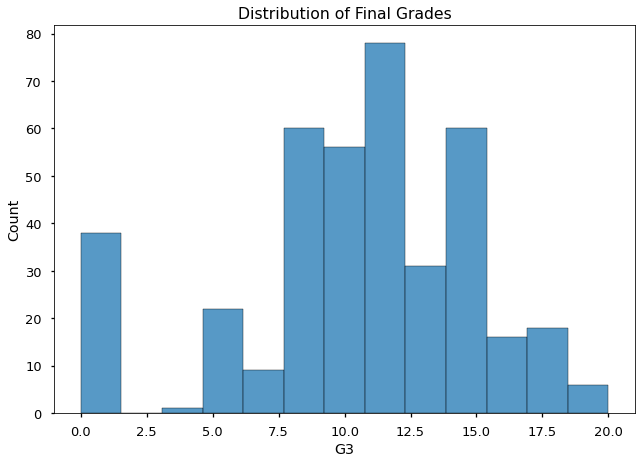

In [6]:
ax = sns.histplot(data=df,x='G3');
ax.set_title("Distribution of Final Grades")

- Lets compare all 3 years of grades on one histogram. Since each grade is a separate column, one approach we could take is to use the histplot function 3 times, once for each column.

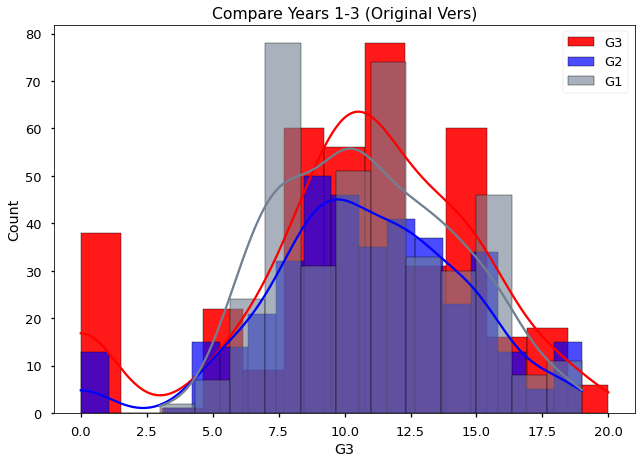

In [7]:
## Use histplot 3 times
sns.histplot(data=df,x='G3',color='r',alpha=0.9,kde=True,label='G3');
sns.histplot(data=df,x='G2',color='b',alpha=0.7,kde=True,label='G2');
sns.histplot(data=df,x='G1',color='slategray',alpha=0.6,kde=True,label='G1');
plt.title('Compare Years 1-3 (Original Vers)')
plt.legend();

- Another way we can leverage seaborn's functionality is to make a new version of our dataframe where the columns "G1"-"G3" will be transposed so that we will have a 1 column with all of the grades and another column with the label for which year the grade was from.

In [8]:
## Let's turn the integer index into a col for student-id
df = df.reset_index()
df = df.rename({'index':'student'},axis=1)
df

student school sex   age address famsize Pstatus  Medu  Fedu      Mjob  \
0          0     GP   F  18.0       U     GT3       A   4.0   4.0   at_home   
1          1     GP   F  17.0       U     GT3       T   1.0   1.0   at_home   
2          2     GP   F  15.0       U     LE3       T   1.0   1.0   at_home   
3          3     GP   F  15.0       U     GT3       T   4.0   2.0    health   
4          4     GP   F  16.0       U     GT3       T   3.0   3.0     other   
..       ...    ...  ..   ...     ...     ...     ...   ...   ...       ...   
390      390     MS   M  20.0       U     LE3       A   2.0   2.0  services   
391      391     MS   M  17.0       U     LE3       T   3.0   1.0  services   
392      392     MS   M  21.0       R     GT3       T   1.0   1.0     other   
393      393     MS   M  18.0       R     LE3       T   3.0   2.0  services   
394      394     MS   M  19.0       U     LE3       T   1.0   1.0     other   

     ... famrel freetime goout  Dalc  Walc  health absences    G1    G2    G3  
0    ...    4.0      3.0   4.0   1.0   1.0     3.0      6.0   5.0   6.0   6.0  
1    ...    5.0      3.0   3.0   1.0   1.0     3.0      4.0   5.0   5.0   6.0  
2    ...    4.0      3.0   2.0   2.0   3.0     3.0     10.0   7.0   8.0  10.0  
3    ...    3.0      2.0   2.0   1.0   1.0     5.0      2.0  15.0  14.0  15.0  
4    ...    4.0      3.0   2.0   1.0   2.0     5.0      4.0   6.0  10.0  10.0  
..   ...    ...      ...   ...   ...   ...     ...      ...   ...   ...   ...  
390  ...    5.0      5.0   4.0   4.0   5.0     4.0     11.0   9.0   9.0   9.0  
391  ...    2.0      4.0   5.0   3.0   4.0     2.0      3.0  14.0  16.0  16.0  
392  ...    5.0      5.0   3.0   3.0   3.0     3.0      3.0  10.0   8.0   7.0  
393  ...    4.0      4.0   1.0   3.0   4.0     5.0      0.0  11.0  12.0  10.0  
394  ...    3.0      2.0   3.0   3.0   3.0     5.0      5.0   8.0   9.0   9.0  

[395 rows x 34 columns]

In [9]:
melted = pd.melt(df,id_vars='student', value_vars=['G1','G2','G3'],var_name='PrevYear',
                value_name="Grade")
melted

student PrevYear  Grade
0           0       G1    5.0
1           1       G1    5.0
2           2       G1    7.0
3           3       G1   15.0
4           4       G1    6.0
...       ...      ...    ...
1180      390       G3    9.0
1181      391       G3   16.0
1182      392       G3    7.0
1183      393       G3   10.0
1184      394       G3    9.0

[1185 rows x 3 columns]

Text(0.5, 1.0, 'Comparing Years 1-3 (Melted Vers)')

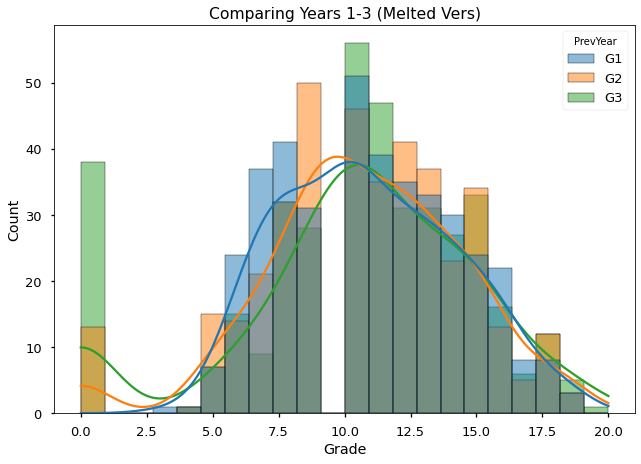

In [10]:
ax = sns.histplot(data=melted,hue='PrevYear', x='Grade',kde=True)
ax.set_title('Comparing Years 1-3 (Melted Vers)')

- Visualizing all 3 grades at the same time, we can see there is actually a gap in the middle of the scores. It seems no student ever receives a grade around 10. This may be something to investigate further in the future.

- It also looks like The # of students with scores near 0 increased each year. 
    - Is there a better way we can see how students performance changed each year?

### Visualizing Progress By Grade Groups

- Let's define groups for each year's scores by binning the scores.



In [11]:
df.describe()[['G1','G2','G3']]

G1          G2          G3
count  395.000000  395.000000  395.000000
mean    10.908861   10.713924   10.415190
std      3.319195    3.761505    4.581443
min      3.000000    0.000000    0.000000
25%      8.000000    9.000000    8.000000
50%     11.000000   11.000000   11.000000
75%     13.000000   13.000000   14.000000
max     19.000000   19.000000   20.000000

In [12]:
## defining bins and their labels
bins = [0,8,14,20]

bin_labels = ['1. low','2. med','3. high']

(0.0, 20.0)

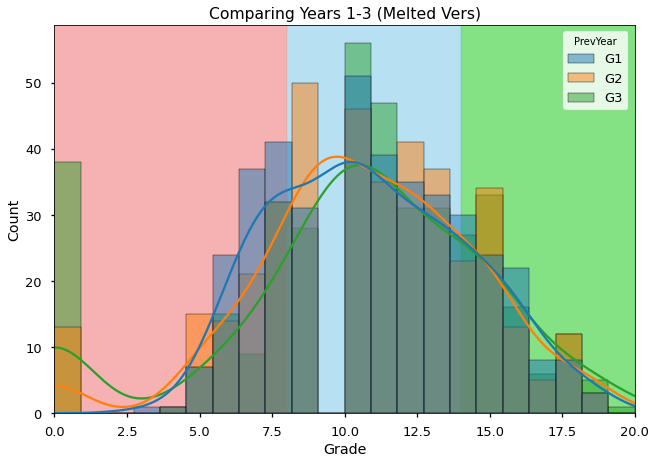

In [13]:
## Visualizing bin cutoffs
ax = sns.histplot(data=melted,hue='PrevYear', x='Grade',kde=True)
ax.set_title('Comparing Years 1-3 (Melted Vers)')
ax.axvspan(bins[0],bins[1],zorder=0,color='lightcoral',label='Low',alpha=0.6)
ax.axvspan(bins[1],bins[2],zorder=0,color='skyblue', label='Med',alpha=0.6)
ax.axvspan(bins[2],bins[3],zorder=0,color='limegreen', label='High',alpha=0.6)
ax.set_xlim(left=0,right=20)

- ADD A BRIEF EXPLANATION

In [14]:
pd.cut(df['G1'], bins,right=False,include_lowest=True)#,labels=bin_labels)

0        [0, 8)
1        [0, 8)
2        [0, 8)
3      [14, 20)
4        [0, 8)
         ...   
390     [8, 14)
391    [14, 20)
392     [8, 14)
393     [8, 14)
394     [8, 14)
Name: G1, Length: 395, dtype: category
Categories (3, interval[int64, left]): [[0, 8) < [8, 14) < [14, 20)]

In [15]:
bins

[0, 8, 14, 20]

In [16]:
df['First-Year Group'] = pd.cut(df['G1'],bins,labels=bin_labels, right=True,include_lowest=True)

In [17]:
df['Final-Year Group'] = pd.cut(df['G3'],bins,labels=bin_labels,right=True,include_lowest=True)
df

student school sex   age address famsize Pstatus  Medu  Fedu      Mjob  \
0          0     GP   F  18.0       U     GT3       A   4.0   4.0   at_home   
1          1     GP   F  17.0       U     GT3       T   1.0   1.0   at_home   
2          2     GP   F  15.0       U     LE3       T   1.0   1.0   at_home   
3          3     GP   F  15.0       U     GT3       T   4.0   2.0    health   
4          4     GP   F  16.0       U     GT3       T   3.0   3.0     other   
..       ...    ...  ..   ...     ...     ...     ...   ...   ...       ...   
390      390     MS   M  20.0       U     LE3       A   2.0   2.0  services   
391      391     MS   M  17.0       U     LE3       T   3.0   1.0  services   
392      392     MS   M  21.0       R     GT3       T   1.0   1.0     other   
393      393     MS   M  18.0       R     LE3       T   3.0   2.0  services   
394      394     MS   M  19.0       U     LE3       T   1.0   1.0     other   

     ... goout Dalc Walc  health  absences    G1    G2    G3 First-Year Group  \
0    ...   4.0  1.0  1.0     3.0       6.0   5.0   6.0   6.0           1. low   
1    ...   3.0  1.0  1.0     3.0       4.0   5.0   5.0   6.0           1. low   
2    ...   2.0  2.0  3.0     3.0      10.0   7.0   8.0  10.0           1. low   
3    ...   2.0  1.0  1.0     5.0       2.0  15.0  14.0  15.0          3. high   
4    ...   2.0  1.0  2.0     5.0       4.0   6.0  10.0  10.0           1. low   
..   ...   ...  ...  ...     ...       ...   ...   ...   ...              ...   
390  ...   4.0  4.0  5.0     4.0      11.0   9.0   9.0   9.0           2. med   
391  ...   5.0  3.0  4.0     2.0       3.0  14.0  16.0  16.0           2. med   
392  ...   3.0  3.0  3.0     3.0       3.0  10.0   8.0   7.0           2. med   
393  ...   1.0  3.0  4.0     5.0       0.0  11.0  12.0  10.0           2. med   
394  ...   3.0  3.0  3.0     5.0       5.0   8.0   9.0   9.0           1. low   

    Final-Year Group  
0             1. low  
1             1. low  
2             2. med  
3            3. high  
4             2. med  
..               ...  
390           2. med  
391          3. high  
392           1. low  
393           2. med  
394           2. med  

[395 rows x 36 columns]

In [18]:
df[df['Final-Year Group'].isna()]

Empty DataFrame
Columns: [student, school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3, First-Year Group, Final-Year Group]
Index: []

[0 rows x 36 columns]

In [19]:
df['Final-Year Group'].value_counts(dropna=False)

2. med     220
1. low     102
3. high     73
Name: Final-Year Group, dtype: int64

In [20]:
melted = pd.melt(df,id_vars=['student','First-Year Group','Final-Year Group'], 
                 value_vars=['G1','G2','G3'],var_name='PrevYear',
                value_name="Grade")
melted

student First-Year Group Final-Year Group PrevYear  Grade
0           0           1. low           1. low       G1    5.0
1           1           1. low           1. low       G1    5.0
2           2           1. low           2. med       G1    7.0
3           3          3. high          3. high       G1   15.0
4           4           1. low           2. med       G1    6.0
...       ...              ...              ...      ...    ...
1180      390           2. med           2. med       G3    9.0
1181      391           2. med          3. high       G3   16.0
1182      392           2. med           1. low       G3    7.0
1183      393           2. med           2. med       G3   10.0
1184      394           1. low           2. med       G3    9.0

[1185 rows x 5 columns]

In [21]:
bins_info = [('1. low',{ 'bins':(bins[0],bins[1]), 
                    'line_color':'darkred','span_color': 'lightcoral'}),
             ('2. med',{ 'bins':(bins[1],bins[2]),
                    'line_color':'blue','span_color':'skyblue'}),
              ('3. high',{ 'bins':(bins[2],bins[3]),
                      'line_color':'forestgreen','span_color':'limegreen'})
            ]
bins_info

[('1. low',
  {'bins': (0, 8), 'line_color': 'darkred', 'span_color': 'lightcoral'}),
 ('2. med', {'bins': (8, 14), 'line_color': 'blue', 'span_color': 'skyblue'}),
 ('3. high',
  {'bins': (14, 20), 'line_color': 'forestgreen', 'span_color': 'limegreen'})]

In [22]:
## slice out list of line colors
line_colors = [v[1]['line_color'] for v in bins_info]
line_colors

['darkred', 'blue', 'forestgreen']

(0.0, 20.0)

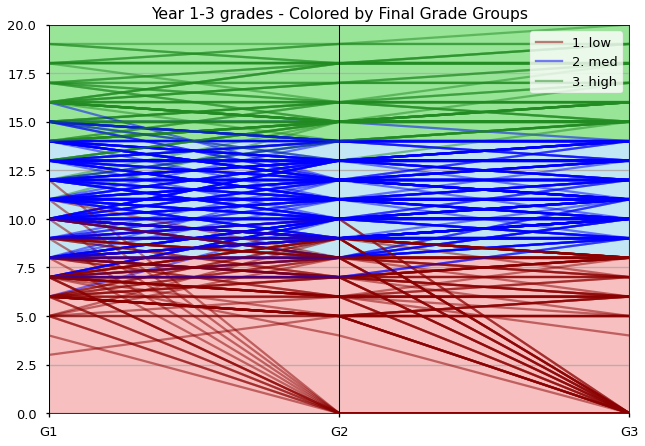

In [23]:
## Plot visual using Final year Groups for colors
ax = pd.plotting.parallel_coordinates(df,'Final-Year Group',cols=['G1','G2','G3'],
                                 color= line_colors,sort_labels=False,alpha=0.5)
ax.set_title("Year 1-3 grades - Colored by Final Grade Groups");

## Annotate
for group, grp_dict in bins_info:
    ax.axhspan(grp_dict['bins'][0],grp_dict['bins'][1],
               color=grp_dict['span_color'], alpha=0.5, label=group)

ax.set_ylim(bottom=0,top=20)

- Looking at our parallel coordinates plot - grouped by Final Grades, we can see that there are students who were in the low group for G3 that had been in the med-group range. So students whose performance dropped from average to below average over the years.
- We can also see that there were some students in the high group whose G1 scores were in the med range, showing that they improved their performance over years 1-3.
- We also notice that there are a lot of zeroes that appear in G2 and G3, what we can see all that lines that were 0 for G2 stayed at 0 for G3.

## Next Steps
-  Now that we have an idea of the target we are analyzing, we are ready to move onto modeling!

- We will start by exploring answering our stakeholder's question(s) with regression modeling.
- Let's get started!

# APPENDIX

In [24]:
raise Exception("stop here")

Exception: stop here

In [ ]:
## exaple from https://pandas.pydata.org/docs/reference/api/pandas.plotting.parallel_coordinates.html
## want a version for g1-g3
df2 = pd.read_csv(
    'https://raw.github.com/pandas-dev/'
    'pandas/main/pandas/tests/io/data/csv/iris.csv'
)
df2
pd.plotting.parallel_coordinates(df2, 'Name')